**Mounting the Google-Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the Data (Digits Dataset):**The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset. Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)

In [ ]:
#importing the dataset
from sklearn.datasets import load_digits
digits = load_digits()
print("Image Data Shape" , digits.data.shape)

Image Data Shape (1797, 64)


**Showing the Images and the Labels (Digits Dataset):**
This section is really just to show what the images and labels look like. It usually helps to visualize your data to see what you are working with.

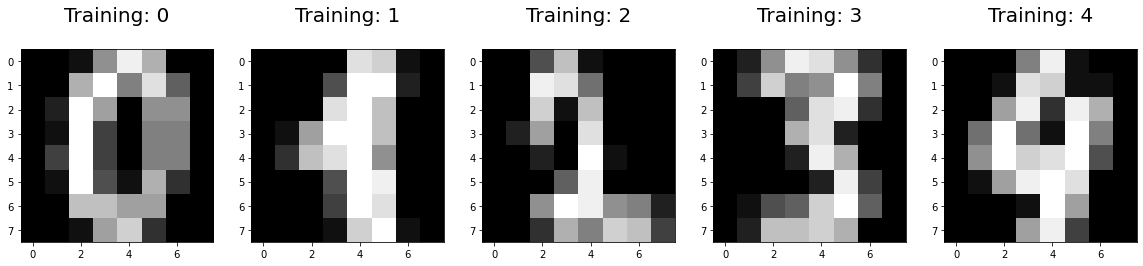

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[10:15], digits.target[10:15])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

**Splitting Data into Training and Test Sets (Digits Dataset):**
We make training and test sets to make sure that after we train our classification algorithm, it is able to generalize well to new data.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.35, random_state=0)

**Scikit-learn 4-Step Modeling Pattern (Digits Dataset):**

Step 1. Importing the model that I want to use.In sklearn, all machine learning models are implemented as Python classes.

Step 2. Making an instance of the  LogisticRegression,SupportVectorMachine and KNeighborsClassifier Model.

Step 3. Training the model on the data, storing the information learned from the data.Model is learning the relationship between digits (x_train) and labels (y_train).

Step 4. Predicting labels for new data (new images).Using the information the model learned during the model training process.Predicting for Multiple Observations (images) at Once.Makingpredictions on entire test data.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

svc = svm.SVC()
svc.fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
score_svc = svc.score(x_test, y_test)
print(score_svc)

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
predictions_knn = knn.predict(x_test)
score_knn = knn.score(x_test, y_test)
print(score_knn)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9523052464228935
0.9872813990461049
0.9825119236883942


**Confusion Matrix:** A confusion matrix is a table that is often used to describe the peformance of a classification model (or classifier) on a set of test data for which the values are known. There are two(Seaborn and Matplotlib) python packages for making Confusion Matrix more understandable and visually appealing.So,importing the libraries.


**Now, I do following steps:**
1.Defining the figure size. In this case, I chose 9x9 size.

2.Using HEATMAP class to generate a confusion matrix.

3.Writing down x and y axis labels and plug in the score.


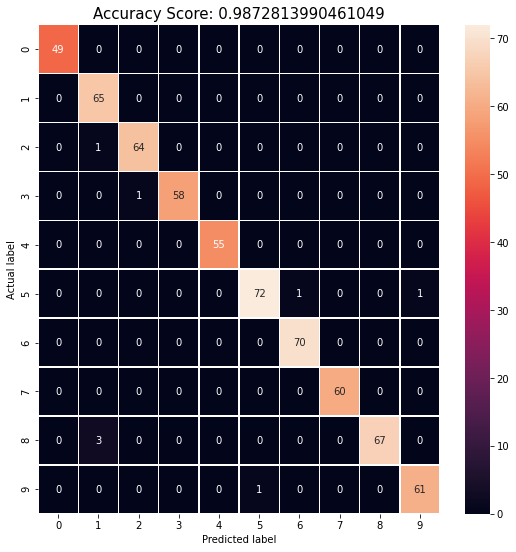

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions_svc)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="", linewidths=.5);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_svc)
plt.title(all_sample_title, size = 15);

I begin by instantiating the Classification Report of the KNN Classifier,it generates is as follows:

In [ ]:
clf_r_knn=metrics.classification_report(y_test, predictions_knn)
print(clf_r_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.96      1.00      0.98        65
           2       0.98      1.00      0.99        65
           3       0.95      0.98      0.97        59
           4       1.00      0.96      0.98        55
           5       0.99      0.97      0.98        74
           6       0.99      1.00      0.99        70
           7       0.98      1.00      0.99        60
           8       1.00      0.94      0.97        70
           9       0.98      0.97      0.98        62

    accuracy                           0.98       629
   macro avg       0.98      0.98      0.98       629
weighted avg       0.98      0.98      0.98       629



I begin by instantiating the Classification Report of the SVM Classifier,it generates is as follows:

In [ ]:
clf_r_svc=metrics.classification_report(y_test, predictions_svc)
print(clf_r_svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.94      1.00      0.97        65
           2       0.98      0.98      0.98        65
           3       1.00      0.98      0.99        59
           4       1.00      1.00      1.00        55
           5       0.99      0.97      0.98        74
           6       0.99      1.00      0.99        70
           7       1.00      1.00      1.00        60
           8       1.00      0.96      0.98        70
           9       0.98      0.98      0.98        62

    accuracy                           0.99       629
   macro avg       0.99      0.99      0.99       629
weighted avg       0.99      0.99      0.99       629



I begin by instantiating the Classification Report of the LogisticRegression Classifier,it generates is as follows:

In [ ]:
clf_r_lr=metrics.classification_report(y_test, predictions)
print(clf_r_lr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       0.87      0.95      0.91        65
           2       0.98      0.94      0.96        65
           3       0.94      0.98      0.96        59
           4       0.96      0.98      0.97        55
           5       0.97      0.95      0.96        74
           6       0.97      0.97      0.97        70
           7       0.98      0.97      0.97        60
           8       0.97      0.87      0.92        70
           9       0.91      0.94      0.92        62

    accuracy                           0.95       629
   macro avg       0.95      0.95      0.95       629
weighted avg       0.95      0.95      0.95       629



The Confusion Matrix of the KNN Classifier is as follows:

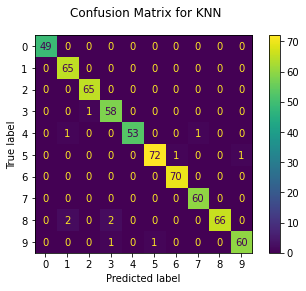

In [ ]:
dp= metrics.plot_confusion_matrix(knn, x_test, y_test)
dp.figure_.suptitle("Confusion Matrix for KNN")
plt.show()

The Confusion Matrix of LogisticRegression Classifier is as follows:

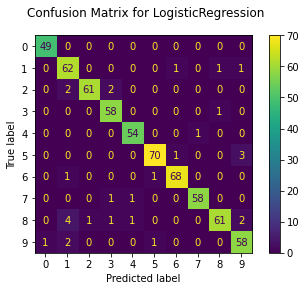

In [ ]:
disp = metrics.plot_confusion_matrix(logisticRegr, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix for LogisticRegression")
plt.show()

The Confusion Matrix of the SVM is as follows:

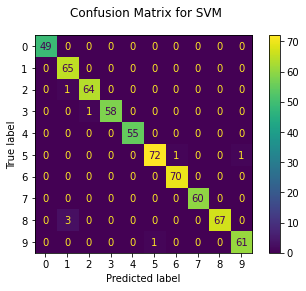

In [ ]:
display = metrics.plot_confusion_matrix(svc, x_test, y_test)
display.figure_.suptitle("Confusion Matrix for SVM")
plt.show()

After executing these Python instructions, we can verify that x_test.shape takes the form of (629, 64) where the first dimension indexes the image and the second indexes the pixel in each image (now the intensity of the pixel is a value between 0 and 1).

In [ ]:
x_test.shape

(629, 64)

**Setting the colormap to 'gray' on the x_test[10] along reshaping(8,8) matrix.This changes the default colormap as well as the colormap of the current image if there is one and testing the particular digit from the y_test[10].**

Label:  2


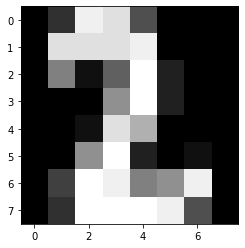

In [ ]:
testing=x_test[10].reshape(8,8)
plt.imshow(testing)
plt.gray()
print('Label: ',y_test[10])

**To predict the K-Nearest Neighbors model on the particular digit(x_test[10]) along reshaping(1,-1).**

In [ ]:
testing=x_test[10].reshape(1,-1)
print(testing.shape)
test_prediction=knn.predict(testing)
print('Predicted Label: ',test_prediction)

(1, 64)
Predicted Label:  [2]


**scikit-image** (a.k.a. skimage) is a collection of algorithms for image processing and computer vision.The main package of skimage only provides a few utilities for converting between image data types,for most features to import one of the following subpackages like **io** (io means Reading, saving, and displaying images and video).

***Reading the image from the folder of the Google-drive and displaying it.***

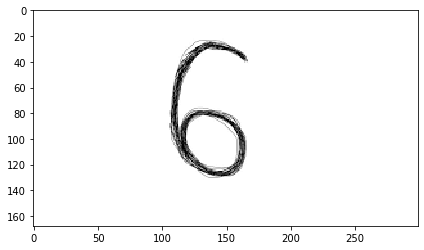

In [ ]:
from skimage import io
testing=io.imread('/content/drive/MyDrive/Colab Notebooks/6.png', as_gray=True)
io.imshow(testing)

**skimage.transform.resize(image, output_shape):** Resize image to match a certain size.

**Here,I importing resize library from skimage for resizing the images and displaying it:**

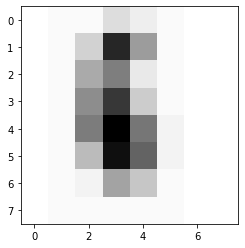

In [ ]:
from skimage.transform import resize
testing1=resize(testing,(8,8))
plt.imshow(testing1)

**To predict the SVM model on the particular digit x_test[13] along reshaping(1,-1).**

In [ ]:
testing=x_test[13].reshape(1,-1)
print(testing.shape)
test_prediction=svc.predict(testing)
print('Predicted Label: ',test_prediction)

(1, 64)
Predicted Label:  [6]


**Again, reading the image from the folder of the Google-drive and displaying it.**

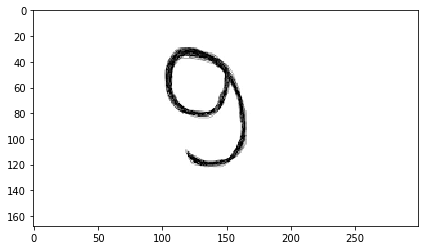

In [ ]:
from skimage import io
testing_1=io.imread('/content/drive/MyDrive/Colab Notebooks/9.png', as_gray=True)
io.imshow(testing_1)

**skimage.transform.resize(image, output_shape):** Resize image to match a certain size.

**Here,I importing resize library from skimage for resizing the images and displaying it:**

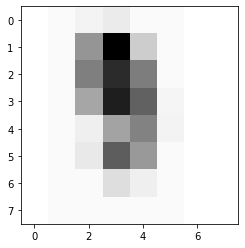

In [ ]:
from skimage.transform import resize
testing_1=resize(testing_1,(8,8))
plt.imshow(testing_1)

**To predict the SVM model on the particular digit x_test[50] along reshaping(1,-1).**

In [ ]:
testing_1=x_test[50].reshape(1,-1)
print(testing_1.shape)
test_prediction_1=svc.predict(testing_1)
print('Predicted Label: ',test_prediction_1)

(1, 64)
Predicted Label:  [9]


**To predict the Logistic Regression model on the particular digit x_test[13] along reshaping(1,-1).**

In [ ]:
testing_1=x_test[50].reshape(1,-1)
print(testing_1.shape)
test_prediction_2=logisticRegr.predict(testing_1)
print('Predicted Label: ',test_prediction_2)

(1, 64)
Predicted Label:  [9]
